In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [20]:

def objecttive_fun(x):
    
    return np.sum(np.square(x))

    pass


In [21]:

# detail of objective function

nvar=10

ub =np.ones(nvar, dtype=int)
lb =np.ones(nvar, dtype=int)

ub*=10
lb*=(-10)

# print(ub)


# define the pso parameter

no_particle = 10
max_iter = 500
w_max = 0.9
w_min=0.2

v_max = (ub - lb) * 0.2
v_min = -v_max

c1= 2
c2=2



In [22]:
## pso algorithm

In [23]:
# initialize the particle 
particle = np.array([])


class Swarm:
    
    class Gbest:
        def __init__(self):
            self.X = np.zeros(nvar)
            self.O = np.inf
    
    def __init__(self, nvar,ub,lb):
        self.nvar =nvar
        self.particle = []
        self.Gbest= self.Gbest() 
    
    
    
    def add_particle(self):
        p = Particle()
        self.particle.append(p)
    
    

In [24]:
class Particle:
    
    class Pbest:
        def __init__(self):
            self.X =np.zeros(nvar)
            self.O = np.inf
            
    def __init__(self):
        self.X = (ub- lb) * np.random.rand(nvar) + lb
        self.V = np.zeros(nvar)
        self.Pbest = self.Pbest()

    

In [25]:
sw=Swarm(10,ub,lb)
for i in range(no_particle):
    sw.add_particle()


In [26]:

for i in range(no_particle):
    print(sw.particle[i].X)
    print(sw.particle[i].V)
    print(sw.particle[i].Pbest.X)

[ 7.37250675  8.27396831  9.50660238  1.78270437 -5.05467446  8.68317362
 -4.74505329 -2.81443777  3.41863906  5.08444806]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 9.7406113   1.1442542   4.56407472 -5.34576694 -7.43395763 -7.52554024
 -9.80697555 -0.27659206  3.88347363 -9.87419831]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1.85960456  3.25730746 -2.93304349  0.69683776 -9.98768267  1.69942537
 -2.42194213 -6.60480458  1.3075609  -8.20144845]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.64546726 -7.3224498   6.84197899  9.66278318  9.2915002   3.39790891
  7.50735115  6.03329628  9.43083109 -6.38959075]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-6.83924558 -8.48558992  9.40356915  9.3647361   8.14359734  7.41394281
 -0.22806776 -9.18159954  5.05256051 -8.58776988]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-6.37077344  2.16104366 -6.1585675  -0.82409355  9.62476047  9.7

In [27]:
sw.particle[0].X

array([ 7.37250675,  8.27396831,  9.50660238,  1.78270437, -5.05467446,
        8.68317362, -4.74505329, -2.81443777,  3.41863906,  5.08444806])

In [30]:
# mainj loop

gbest= []

for t in range(500):
    
    # calculate objective value
    for k in range(no_particle):
    
        currentX = sw.particle[k].X
        current_o= objecttive_fun(currentX)
        
     
#         print(current_o)
        # update pbest
        if current_o < sw.particle[k].Pbest.O:
            sw.particle[k].Pbest.X = currentX
            sw.particle[k].Pbest.O = current_o
            
       
        # update gbest
        if current_o < sw.Gbest.O:
            sw.Gbest.X = currentX
            sw.Gbest.O = current_o

        # update the initial weight
        w = w_max - (t+1) * ((w_max - w_min)/ max_iter)
        
        
    for k in range(no_particle):
        
        sw.particle[k].V = w * sw.particle[k].V \
        + c1 * np.random.rand(nvar) * (sw.particle[k].Pbest.X - sw.particle[k].X) \
        + c2 * np.random.rand(nvar) * (sw.Gbest.X - sw.particle[k].X)
            
            
#         print(sw.particle[k].V)
        sw.particle[k].V = np.minimum(sw.particle[k].V, v_max)
        sw.particle[k].V = np.maximum(sw.particle[k].V, v_min)
        
        sw.particle[k].X = sw.particle[k].X + sw.particle[k].V
       
        sw.particle[k].X = np.minimum(sw.particle[k].X, ub)
        sw.particle[k].X = np.maximum(sw.particle[k].X, lb)
#         print(sw.particle[k].X)


    gbest.append(sw.Gbest.O)
        
    
print(f"Iter= {t+1} Gbest={ sw.Gbest.O}")
        

Iter= 500 Gbest=1.46718632136321e-24


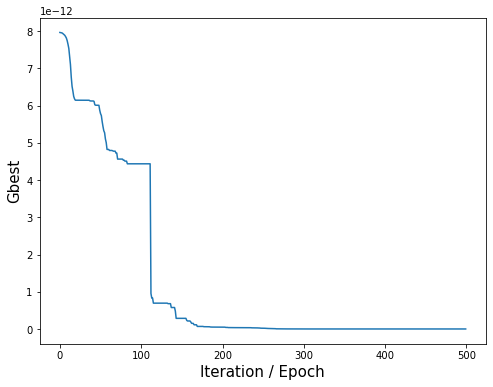

In [31]:

plt.figure(figsize = (8,6))
plt.plot(range(max_iter), gbest)
plt.xlabel("Iteration / Epoch",fontsize=15)
plt.ylabel("Gbest",fontsize=15)
plt.show()